# Settings

In [2]:
import librosa
import numpy as np
import pandas as pd
import os
import soundfile as sf

import matplotlib.pyplot as plt
from utils import helper

In [3]:
df = pd.read_csv("C:/Users/frees/Desktop/UnderwaterClassification/datasets_csv/audio_features_dataset_prep.csv")

In [4]:
file_path ='C:/Users/frees/Desktop/UnderwaterClassification/file_audio\RightWhale.wav'

In [5]:
amplitudes = df['Ampiezza del segnale'].tolist()

In [6]:
def plot_distribution_boxplot(values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(values)
    plt.title(title)
    plt.xlabel('Indice')
    plt.ylabel('Valore')
    plt.grid(True)
    plt.show()

# Preprocessing

## 1. Normalizzazione dei segnali digitali

Per lo studio dei segnali audio occore effettuare alcune modifiche. In particolare, una delle prime fasi del preprocessing, consiste nel normalizzare, ovvero portare l'ampiezza del segnale audio tra -1 e 1.

per normalizzare gli audio all'interno del dataset è stato utilizzato il metodo normalize() di librosa. Nell'esempio seguente si nota che l'ampiezza del segnale audio resta compresa tra -1 e 1. 

In [7]:
y, sr = librosa.load(file_path, sr=None)
# Normalizza il segnale audio
y = librosa.util.normalize(y)

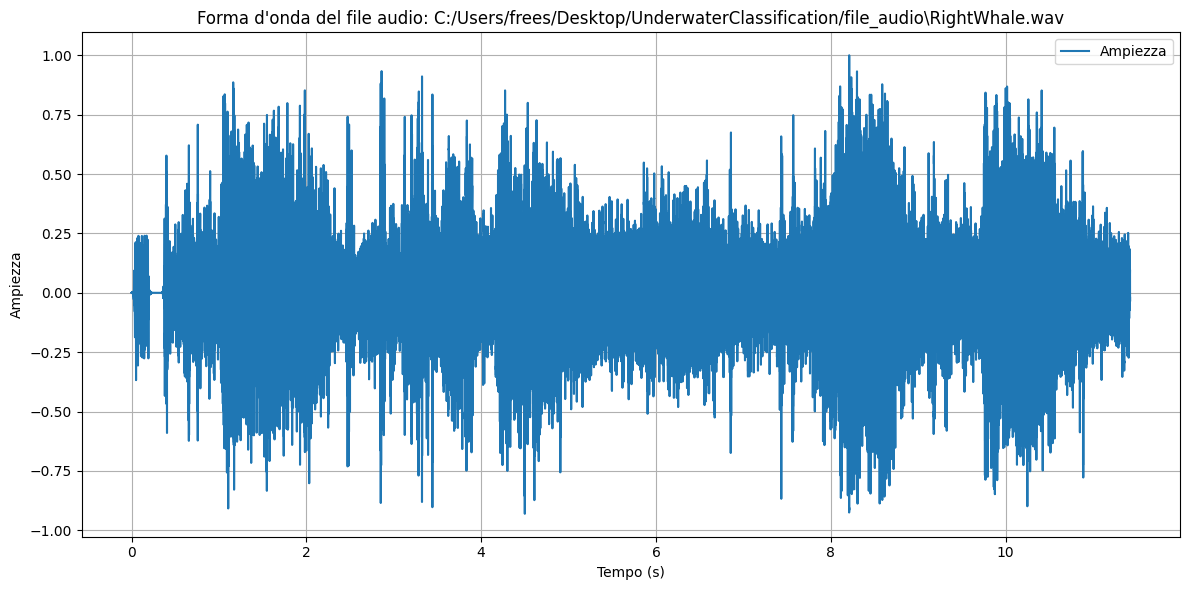

In [8]:
helper.plot_audio_waveform(file_path)

Se abbiamo normalizzato correttamente, i valori saranno tutti compresi tra -1 e 1 e il valore massimo assoluto del segnale sarà molto vicino a 1 (come mostrato nel grafico seguente).

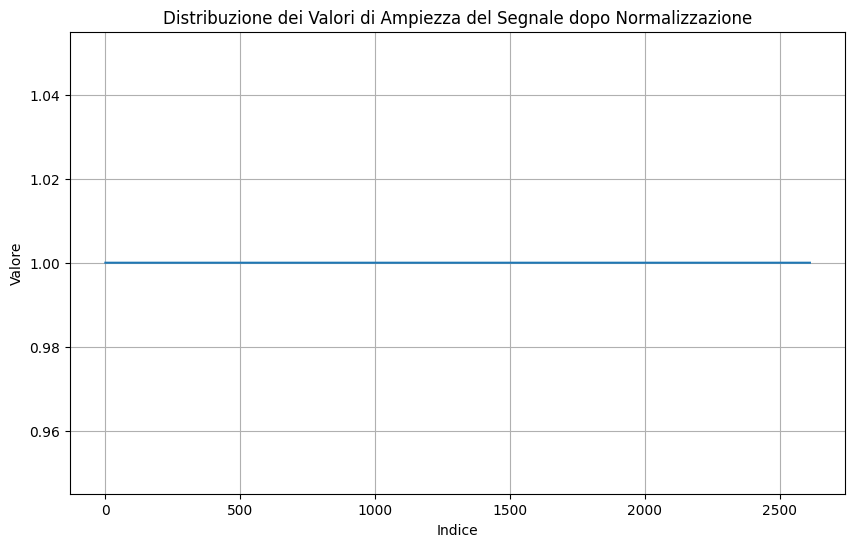

In [9]:
plot_distribution_boxplot(amplitudes, 'Distribuzione dei Valori di Ampiezza del Segnale dopo Normalizzazione')

## 1.1 Bit Depth & Canali

Successivamente i file sono stati portati a 16 bit depth e in monocanale.

I file audio sono stati convertiti tutti in .wav per una maggiore uniformità e per garantire la conversione a 16 bit depth in monocanale con librosa.

In [10]:
def convert_to_wav(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None, mono=True)
        wav_file_path = os.path.splitext(file_path)[0] + '.wav'
        sf.write(wav_file_path, y, sr, subtype='PCM_16')
        return wav_file_path
    except Exception as e:
        print(f"Errore durante la conversione in WAV del file '{file_path}': {e}")
        return None

con librosa i file sono stati caricati in monocanale a 16 bit depth. Di seguito un esempio su un file audio

In [11]:
y, sr = librosa.load(file_path, sr=None, mono=True)
y_16bit = np.int16(y * 32767)

spettrogramma del file audio

In [12]:
duration = librosa.get_duration(y=y, sr=sr)

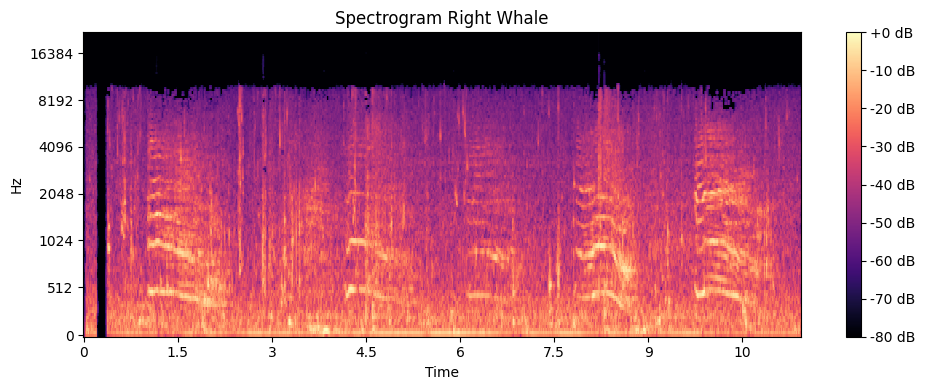

In [13]:
helper.create_spectrogram(file_path, sr, "Spectrogram Right Whale")

In [14]:
y.shape, sr, duration

((503808,), 44100, 11.42421768707483)

In [15]:
sr * duration

503808.0

questi sono i risultati su tutto il dataset in seguito alla prima fase di preprocessing

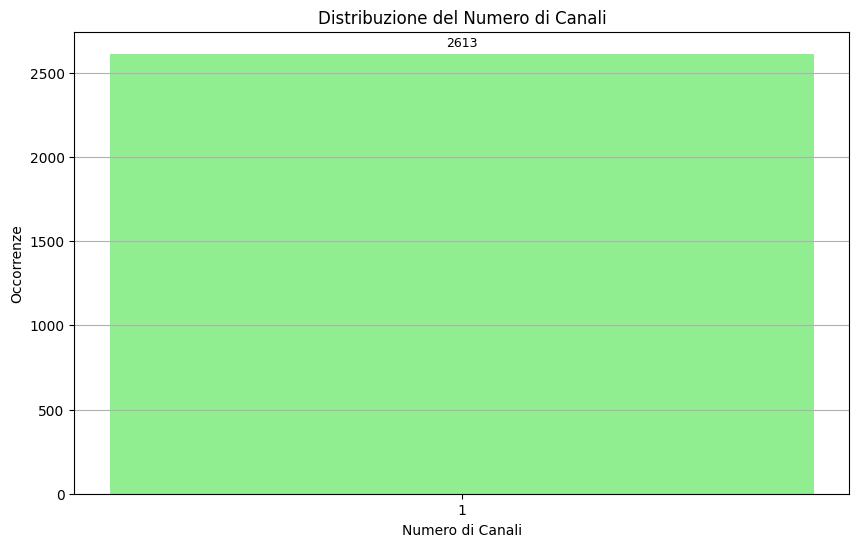

In [16]:
helper.prep_plot_channel_distribution(df)


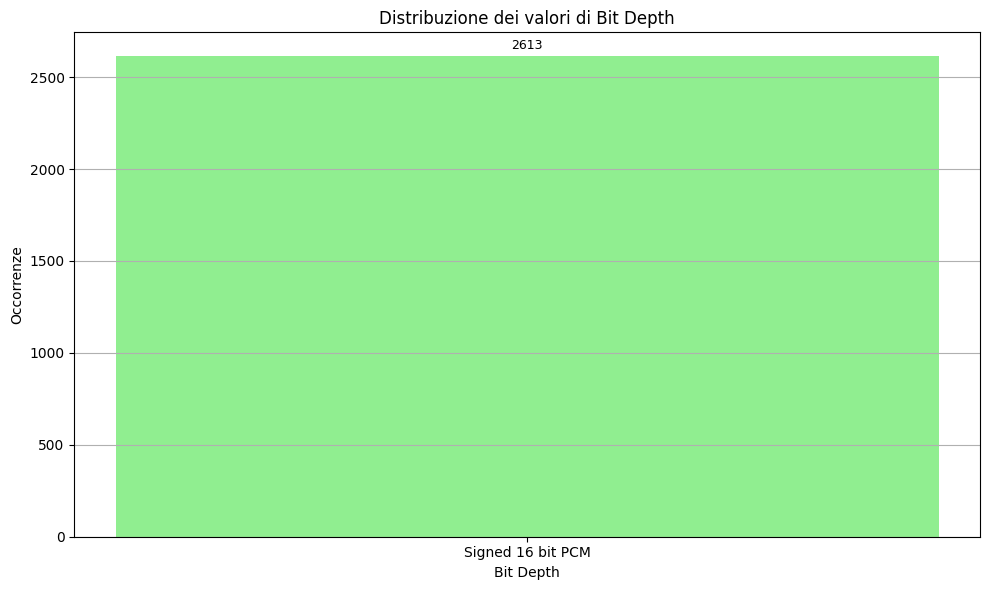

In [17]:
helper.prep_plot_bit_depth_distribution(df)

dataset dopo prime fasi di preprocessing

In [18]:
df_normalized = pd.read_csv("C:/Users/frees/Desktop/UnderwaterClassification/datasets_csv/audio_features_dataset_prep.csv")
df_normalized

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,Forma d'onda
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7,Non-Target,Ambient Noise,1.0,31.207619,44100,1,-0.303497,0.0,Signed 16 bit PCM,"(1376256,)"
1,2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61,Non-Target,Ambient Noise,1.0,31.207619,44100,1,0.005098,0.0,Signed 16 bit PCM,"(1376256,)"
2,2f574049-3325-446c-a8ac-2e5b31e9e32f,Non-Target,Ambient Noise,1.0,31.207619,44100,1,-0.079398,0.0,Signed 16 bit PCM,"(1376256,)"
3,30679527-fd7a-4cad-8c7d-cb1bcc07604d,Non-Target,Ambient Noise,1.0,31.207619,44100,1,0.065793,0.0,Signed 16 bit PCM,"(1376256,)"
4,f9652ad2-39f5-41b4-a8e4-89171a864f03,Non-Target,Ambient Noise,1.0,31.207619,44100,1,0.067498,0.0,Signed 16 bit PCM,"(1376256,)"
...,...,...,...,...,...,...,...,...,...,...,...
2608,SanctSound_OC01_03_ship_20191106T223751Z,Target,Vessel,1.0,5.305042,48000,1,0.000000,0.0,Signed 16 bit PCM,"(254642,)"
2609,SanctSound_OC02_01_ship_20190419T233040Z,Target,Vessel,1.0,60.000000,48000,1,0.000000,0.0,Signed 16 bit PCM,"(2880000,)"
2610,SanctSound_OC03_02_ship_20200228T080107Z,Target,Vessel,1.0,60.000000,48000,1,-0.000121,0.0,Signed 16 bit PCM,"(2880000,)"
2611,SanctSound_SB03_09_vessel_20200415T161235Z,Target,Vessel,1.0,5.000021,48000,1,0.000000,0.0,Signed 16 bit PCM,"(240001,)"


## 2 Resampling

Per l'analisi di suoni ambientali è stato scelto di ricampionare a new_sr.

In [19]:
new_sr = 96000

In [20]:
y_res = librosa.resample(y, orig_sr=sr, target_sr= new_sr)
y = y_res
sr = new_sr

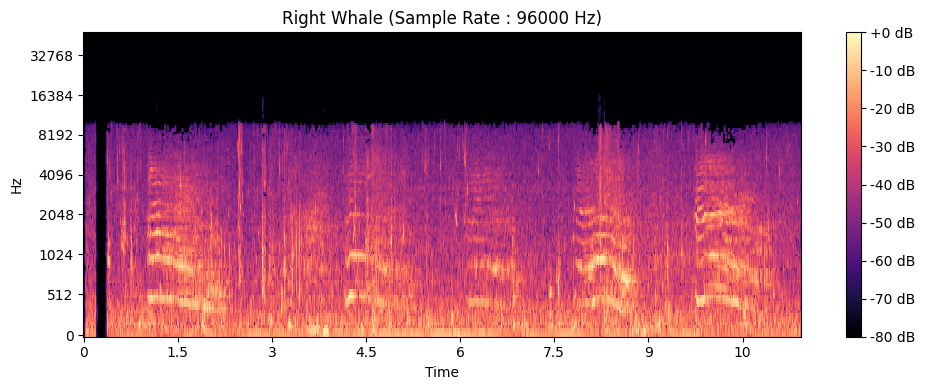

In [21]:
helper.create_spectrogram(file_path, new_sr, "Right Whale (Sample Rate : 96000 Hz)")

In [22]:
duration = librosa.get_duration(y=y, sr=sr)
y.shape, sr, duration

((1096725,), 96000, 11.42421875)

in seguito tutto il dataset è stato portato a new_sr.

In [25]:
pd_res = pd.read_csv("C:/Users/frees/Desktop/UnderwaterClassification/datasets_csv/audio_features_dataset_96000.csv")
pd_res

,Nome file,Classe,Sottoclasse,Ampiezza del segnale,Durata,Frequenza,Numero di canali,Fase,Frequenza massima interna,Bit Depth,n_fft,Forma d'onda
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7,Non-Target,Ambient Noise,1.000000,31.207625,96000,1,-0.289520,0.0,Signed 16 bit PCM,2048,"(2995932,)"
1,2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61,Non-Target,Ambient Noise,0.981415,31.207625,96000,1,0.005035,0.0,Signed 16 bit PCM,2048,"(2995932,)"
2,2f574049-3325-446c-a8ac-2e5b31e9e32f,Non-Target,Ambient Noise,0.998596,31.207625,96000,1,-0.076233,0.0,Signed 16 bit PCM,2048,"(2995932,)"
3,30679527-fd7a-4cad-8c7d-cb1bcc07604d,Non-Target,Ambient Noise,1.000000,31.207625,96000,1,0.067596,0.0,Signed 16 bit PCM,2048,"(2995932,)"
4,f9652ad2-39f5-41b4-a8e4-89171a864f03,Non-Target,Ambient Noise,1.000000,31.207625,96000,1,0.064545,0.0,Signed 16 bit PCM,2048,"(2995932,)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2608,SanctSound_OC01_03_ship_20191106T223751Z,Target,Vessel,0.999969,5.305042,96000,1,0.000061,0.0,Signed 16 bit PCM,2048,"(509284,)"
2609,SanctSound_OC02_01_ship_20190419T233040Z,Target,Vessel,0.999969,60.000000,96000,1,-0.000061,0.0,Signed 16 bit PCM,2048,"(5760000,)"
2610,SanctSound_OC03_02_ship_20200228T080107Z,Target,Vessel,1.000000,60.000000,96000,1,-0.000214,0.0,Signed 16 bit PCM,2048,"(5760000,)"
2611,SanctSound_SB03_09_vessel_20200415T161235Z,Target,Vessel,0.994141,5.000021,96000,1,-0.000122,0.0,Signed 16 bit PCM,2048,"(480002,)"


## 2.1 Segmentazione

I file nel dataset sono stati tagliati ogni 4 secondi. Adesso il dataset contiene campioni di file audio di 4 secondi o inferiori.

In [26]:
ds = pd.read_csv("C:/Users/frees/Desktop/UnderwaterClassification/datasets_csv/segment_features_dataset_96000.csv")
ds

,Nome file,Classe,Sottoclasse,Durata,Numero di segmento,File di Provenienza
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg1.wav,Non-Target,Ambient Noise,4.000,1,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.wav
1,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg2.wav,Non-Target,Ambient Noise,4.000,2,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.wav
2,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg3.wav,Non-Target,Ambient Noise,4.000,3,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.wav
3,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg4.wav,Non-Target,Ambient Noise,4.000,4,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.wav
4,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg5.wav,Non-Target,Ambient Noise,4.000,5,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.wav
...,...,...,...,...,...,...
50988,ship_small_seg9.wav,Target,Vessel,4.000,9,ship_small.wav
50989,ship_small_seg10.wav,Target,Vessel,4.000,10,ship_small.wav
50990,ship_small_seg11.wav,Target,Vessel,4.000,11,ship_small.wav
50991,ship_small_seg12.wav,Target,Vessel,4.000,12,ship_small.wav


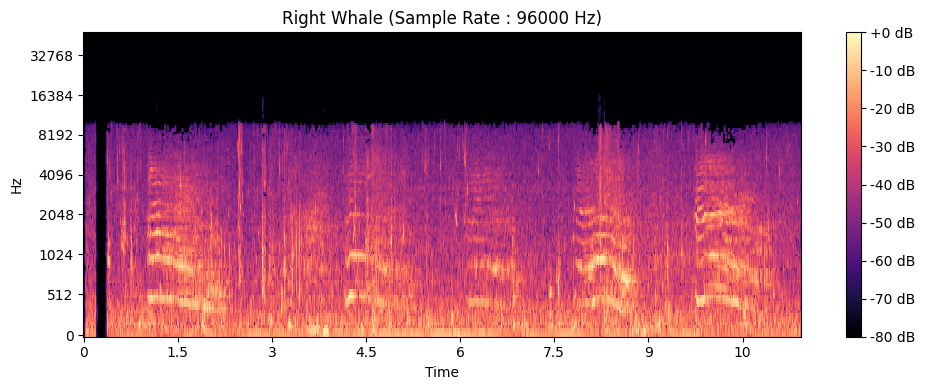

In [27]:

helper.create_spectrogram(file_path, new_sr, "Right Whale (Sample Rate : 96000 Hz)")


campioni audio da 4 secondi

In [28]:
original_audio = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/file_audio/RightWhale_seg'

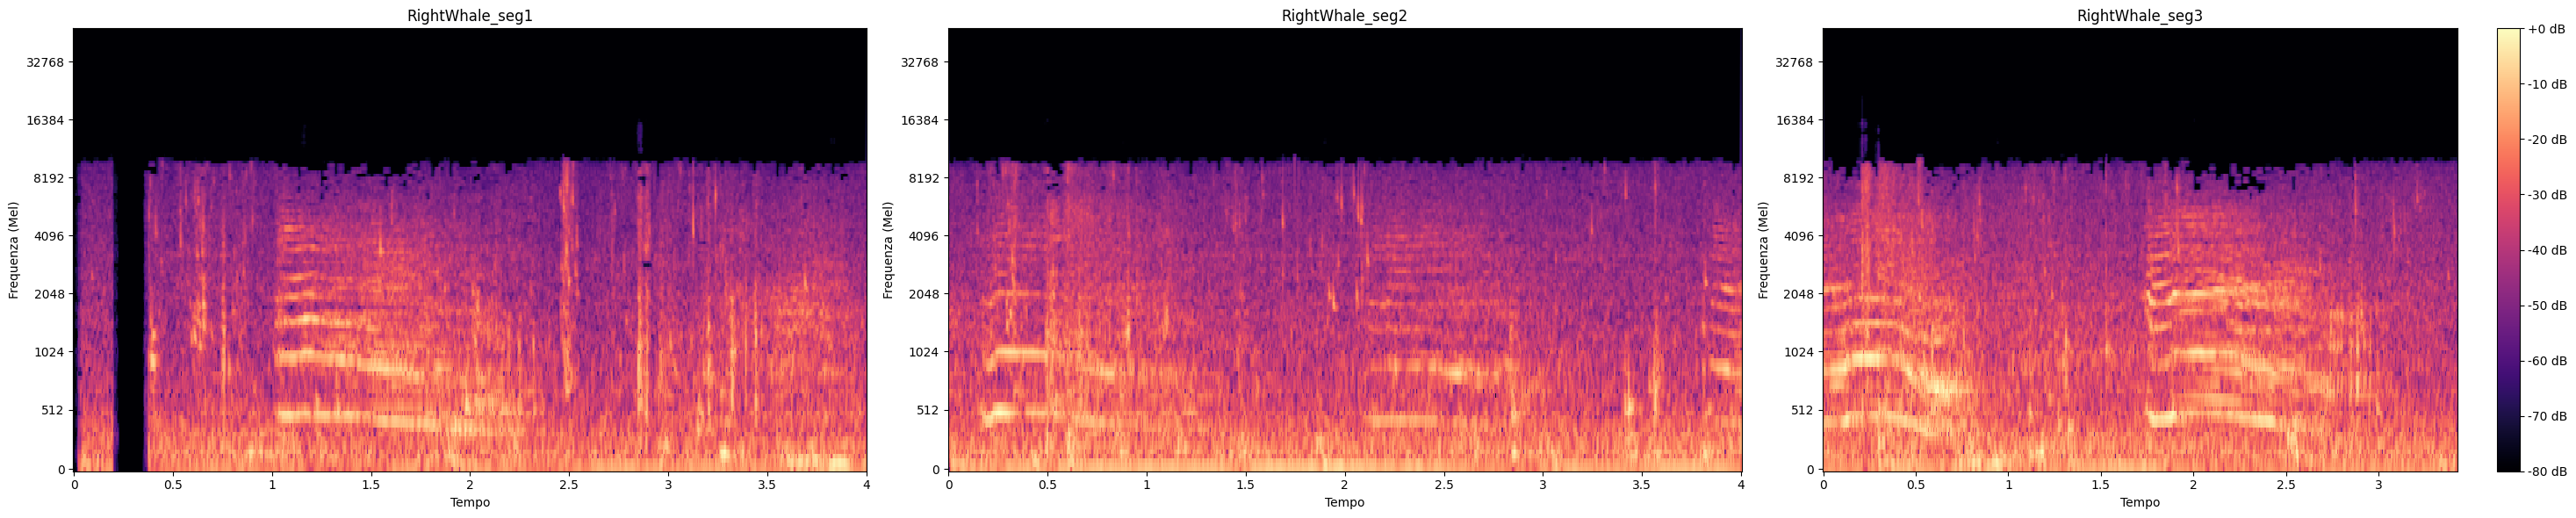

In [29]:
helper.subplot(original_audio, new_sr)

## 2.3 Padding

I file audio sono stati portati tutti a 4 secondi. E' stato aggiunto silenzio nei file audio inferiori a 4 secondi, per garantire un dataset bilanciato

Segmento del file audio prima dell'aggiunta di silenzio

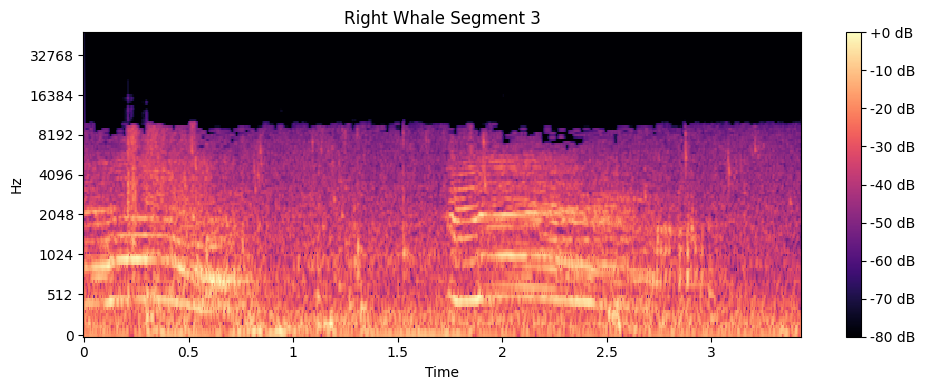

In [30]:
file_path_segment = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/file_audio/RightWhale_seg3.wav'
helper.create_spectrogram(file_path_segment, new_sr, "Right Whale Segment 3")
y_seg, sr = librosa.load(file_path_segment, sr=sr)

In [31]:
duration = librosa.get_duration(y=y_seg, sr=sr)
duration

3.42421875

il segmento di file era inferiore ai 4 secondi. E' stato aggiunto silenzio per portarlo a 4.

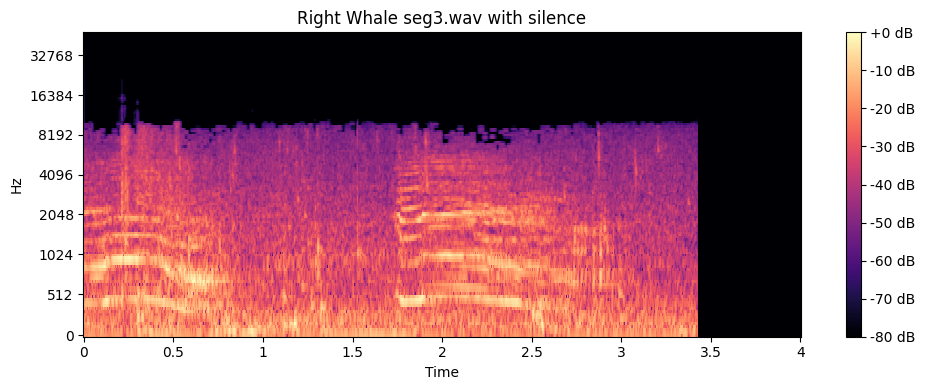

In [32]:
file_path_segment_silencied = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/file_audio/RightWhale_3_silenced.wav'
helper.create_spectrogram(file_path_segment_silencied, new_sr, "Right Whale seg3.wav with silence")
y_sil, sr = librosa.load(file_path_segment_silencied, sr=sr)

In [33]:
duration = librosa.get_duration(y=y_sil, sr=sr)
duration 

4.00009375

Dataset segmentato a 4 secondi

In [35]:
df_silenced = pd.read_csv('C:/Users/frees/Desktop/UnderwaterClassification/datasets_csv/segment_features_dataset_96000_pad.csv')
df_silenced

,Nome file,Classe,Sottoclasse,Durata
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg1,Non-Target,Ambient Noise,4000
1,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg2,Non-Target,Ambient Noise,4000
2,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg3,Non-Target,Ambient Noise,4000
3,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg4,Non-Target,Ambient Noise,4000
4,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg5,Non-Target,Ambient Noise,4000
...,...,...,...,...
50988,ship_small_seg5,Target,Vessel,4000
50989,ship_small_seg6,Target,Vessel,4000
50990,ship_small_seg7,Target,Vessel,4000
50991,ship_small_seg8,Target,Vessel,4000
